In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell

df_survey_schema = pd.read_csv('survey_results_schema.csv')

df_answers = pd.read_csv('survey_results_public.csv',
                         usecols = ['Respondent', 'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'Age', 'Student', 'BetterLife'],
                        index_col = ['Respondent'])
pd.options.display.max_columns = None
df_answers.head()

,Hobbyist,Student,YearsCode,Age1stCode,YearsCodePro,CompFreq,ConvertedComp,WorkWeekHrs,BetterLife,Age
Respondent,,,,,,,,,,
1,Yes,No,4,10,NaN,NaN,NaN,NaN,Yes,14.0
2,No,"Yes, full-time",NaN,17,NaN,NaN,NaN,NaN,Yes,19.0
3,Yes,No,3,22,1,Monthly,8820.0,40.0,Yes,28.0
4,No,No,3,16,Less than 1 year,Yearly,61000.0,80.0,Yes,22.0
5,Yes,No,16,14,9,NaN,NaN,55.0,Yes,30.0


In [3]:
df_answers.shape

(88883, 10)

In [4]:
pd.unique(df_answers.Age1stCode)

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', 'Younger than 5 years', '33', '25', '26', '39', '36',
       '38', '28', '31', 'Older than 85', '32', '37', '50', '65', '42',
       '34', '40', '67', '43', '44', '60', '46', '45', '49', '51', '41',
       '55', '83', '48', '53', '54', '47', '56', '79', '61', '68', '77',
       '66', '52', '80', '62', '84', '57', '58', '63'], dtype=object)

In [5]:
df_answers.Age1stCode.replace(to_replace = {'Younger than 5 years': '4',
                                            'Older than 85': '85'}, inplace=True)

In [6]:
pd.unique(df_answers.Age1stCode)

array(['10', '17', '22', '16', '14', '15', '11', '20', '13', '18', '12',
       '19', '21', '8', '35', '6', '9', '29', '7', '5', '23', '30', nan,
       '27', '24', '4', '33', '25', '26', '39', '36', '38', '28', '31',
       '85', '32', '37', '50', '65', '42', '34', '40', '67', '43', '44',
       '60', '46', '45', '49', '51', '41', '55', '83', '48', '53', '54',
       '47', '56', '79', '61', '68', '77', '66', '52', '80', '62', '84',
       '57', '58', '63'], dtype=object)

In [7]:

df_answers.YearsCode.replace(to_replace = {'Less than 1 year': '1',
                                            'More than 50 years': '50'}, inplace=True)
pd.unique(df_answers.YearsCode)

array(['4', nan, '3', '16', '13', '6', '8', '12', '2', '5', '17', '10',
       '14', '35', '7', '1', '30', '9', '26', '40', '19', '15', '20',
       '28', '25', '22', '11', '33', '50', '41', '18', '34', '24', '23',
       '42', '27', '21', '36', '32', '39', '38', '31', '37', '29', '44',
       '45', '48', '46', '43', '47', '49'], dtype=object)

In [8]:
pd.unique(df_answers.YearsCodePro)

array([nan, '1', 'Less than 1 year', '9', '3', '4', '10', '8', '2', '13',
       '18', '5', '14', '22', '23', '19', '35', '20', '25', '7', '15',
       '27', '6', '48', '12', '31', '11', '17', '16', '21', '29', '30',
       '26', '33', '28', '37', '40', '34', '24', '39', '38', '36', '32',
       '41', '45', '43', 'More than 50 years', '44', '42', '46', '49',
       '50', '47'], dtype=object)

In [9]:
df_answers.YearsCodePro.replace(to_replace = {'Less than 1 year': '1',
                                            'More than 50 years': '50'}, inplace=True)

In [10]:
pd.unique(df_answers.YearsCodePro)

array([nan, '1', '9', '3', '4', '10', '8', '2', '13', '18', '5', '14',
       '22', '23', '19', '35', '20', '25', '7', '15', '27', '6', '48',
       '12', '31', '11', '17', '16', '21', '29', '30', '26', '33', '28',
       '37', '40', '34', '24', '39', '38', '36', '32', '41', '45', '43',
       '50', '44', '42', '46', '49', '47'], dtype=object)

In [11]:
pd.unique(df_answers.Age)

array([14. , 19. , 28. , 22. , 30. , 42. , 24. , 23. ,  nan, 21. , 31. ,
       20. , 26. , 29. , 38. , 47. , 34. , 32. , 25. , 17. , 35. , 27. ,
       44. , 43. , 62. , 37. , 45. , 18. , 33. , 36. , 16. , 39. , 64. ,
       41. , 54. , 49. , 40. , 56. , 12. , 58. , 46. , 59. , 51. , 48. ,
       57. , 52. , 50. , 23.9, 55. , 15. , 67. , 13. ,  1. , 53. , 69. ,
       65. , 17.5, 63. , 61. , 68. , 73. , 70. , 60. , 16.5, 46.5, 11. ,
       71. ,  3. , 97. , 29.5, 77. , 74. , 26.5, 26.3, 24.5, 78. , 72. ,
       66. , 76. , 10. , 75. , 99. , 83. , 79. , 36.8, 14.1, 13.5, 19.5,
       98. , 43.5, 22.5, 31.5, 21.5, 28.5, 33.6,  2. , 38.5, 30.8, 24.8,
       90. , 61.3, 81. ,  4. , 17.3, 19.9, 80. , 85. , 88. , 23.5, 16.9,
       20.9, 91. , 98.9, 57.9,  9. , 94. , 95. , 37.5, 14.5,  5. , 82. ,
       84. , 37.3, 33.5, 53.8, 31.4, 87. ])

In [12]:
df_answers.loc[df_answers['CompFreq']=='Monthly', 'ConvertedComp'] = df_answers['ConvertedComp']*12

In [13]:
df_answers.loc[df_answers['CompFreq']=='Weekly', 'ConvertedComp'] = df_answers['ConvertedComp']*52

In [14]:
df_answers.drop('CompFreq', axis=1, inplace=True)

In [15]:
df_answers.head()

,Hobbyist,Student,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,BetterLife,Age
Respondent,,,,,,,,,
1,Yes,No,4,10,NaN,NaN,NaN,Yes,14.0
2,No,"Yes, full-time",NaN,17,NaN,NaN,NaN,Yes,19.0
3,Yes,No,3,22,1,105840.0,40.0,Yes,28.0
4,No,No,3,16,1,61000.0,80.0,Yes,22.0
5,Yes,No,16,14,9,NaN,55.0,Yes,30.0


In [16]:
df_answers.dtypes

Hobbyist          object
Student           object
YearsCode         object
Age1stCode        object
YearsCodePro      object
ConvertedComp    float64
WorkWeekHrs      float64
BetterLife        object
Age              float64
dtype: object

In [17]:
df_answers[['YearsCode','Age1stCode','YearsCodePro']] = df_answers[['YearsCode','Age1stCode','YearsCodePro']].astype('float64', copy=False)

In [18]:
df_answers.dtypes

Hobbyist          object
Student           object
YearsCode        float64
Age1stCode       float64
YearsCodePro     float64
ConvertedComp    float64
WorkWeekHrs      float64
BetterLife        object
Age              float64
dtype: object

In [19]:
df_answers.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.246663,0.872745,0.010646,0.016252,0.780571
Age1stCode,-0.246663,1.000000,-0.133885,0.001428,-0.000632,0.106806
YearsCodePro,0.872745,-0.133885,1.000000,0.010461,0.016571,0.818525
ConvertedComp,0.010646,0.001428,0.010461,1.000000,0.003351,0.021344
WorkWeekHrs,0.016252,-0.000632,0.016571,0.003351,1.000000,0.019976
Age,0.780571,0.106806,0.818525,0.021344,0.019976,1.000000


In [20]:
df_base = df_answers[['YearsCode','Age1stCode','YearsCodePro','ConvertedComp','WorkWeekHrs','Age']]
df_base.dropna()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
Respondent,,,,,,
3,3.0,22.0,1.0,105840.0,40.00,28.0
4,3.0,16.0,1.0,61000.0,80.00,22.0
6,13.0,15.0,3.0,4397040.0,15.00,28.0
9,12.0,11.0,4.0,95179.0,32.00,23.0
13,17.0,11.0,8.0,90000.0,40.00,28.0
...,...,...,...,...,...,...
88877,31.0,18.0,28.0,104000000.0,45.00,48.0
88878,12.0,14.0,3.0,130000.0,40.00,26.0
88879,17.0,16.0,7.0,989856.0,37.75,34.0


In [21]:
df_base.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.246663,0.872745,0.010646,0.016252,0.780571
Age1stCode,-0.246663,1.000000,-0.133885,0.001428,-0.000632,0.106806
YearsCodePro,0.872745,-0.133885,1.000000,0.010461,0.016571,0.818525
ConvertedComp,0.010646,0.001428,0.010461,1.000000,0.003351,0.021344
WorkWeekHrs,0.016252,-0.000632,0.016571,0.003351,1.000000,0.019976
Age,0.780571,0.106806,0.818525,0.021344,0.019976,1.000000


In [22]:
df_answers.Hobbyist.replace(to_replace = {'Yes': '1',
                                            'No': '0'}, inplace=True)

In [23]:
pd.unique(df_answers.Student)

array(['No', 'Yes, full-time', nan, 'Yes, part-time'], dtype=object)

In [24]:
df_answers.Student.replace(to_replace = {'Yes, full-time': '1',
                                         'Yes, part-time': '1',
                                            'No': '0'}, inplace=True)

In [25]:
pd.unique(df_answers.BetterLife)
df_answers.BetterLife.replace(to_replace = {'Yes': '1',
                                            'No': '0'}, inplace=True)

In [26]:
df_base_sd = df_base[np.abs(df_base - df_base.mean()) <= 3*df_base.std()]

df_base_sd.isna().sum()

YearsCode         2193
Age1stCode        2289
YearsCodePro     15843
ConvertedComp    33863
WorkWeekHrs      24811
Age              10876
dtype: int64

In [27]:
df_base_sd = df_base_sd.dropna()


In [120]:
df_base_sd.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.412755,0.852493,0.084189,0.071465,0.771103
Age1stCode,-0.412755,1.000000,-0.245776,-0.040530,-0.009475,-0.099885
YearsCodePro,0.852493,-0.245776,1.000000,0.084192,0.080313,0.809305
ConvertedComp,0.084189,-0.040530,0.084192,1.000000,0.025785,0.080113
WorkWeekHrs,0.071465,-0.009475,0.080313,0.025785,1.000000,0.091502
Age,0.771103,-0.099885,0.809305,0.080113,0.091502,1.000000


In [121]:
Q1 = df_base.quantile(0.25)
Q3 = df_base.quantile(0.75)
IQR = Q3 - Q1

df_base_q = df_base[~((df_base < (Q1 - 1.5 * IQR)) | (df_base > (Q3 + 1.5 * IQR))).any(axis=1)]

In [122]:
df_base_q.corr()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
YearsCode,1.000000,-0.315792,0.815510,0.096021,-0.014419,0.727692
Age1stCode,-0.315792,1.000000,-0.214732,-0.053320,0.048979,0.008667
YearsCodePro,0.815510,-0.214732,1.000000,0.090714,0.017184,0.768733
ConvertedComp,0.096021,-0.053320,0.090714,1.000000,-0.020780,0.072159
WorkWeekHrs,-0.014419,0.048979,0.017184,-0.020780,1.000000,0.013387
Age,0.727692,0.008667,0.768733,0.072159,0.013387,1.000000


In [123]:
df_base_sd.describe()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
count,50276.000000,50276.000000,50276.000000,5.027600e+04,50276.000000,50276.000000
mean,12.370336,15.020626,7.562873,7.695225e+05,40.151848,30.810001
std,7.935801,4.313857,6.247411,2.488247e+06,9.813245,7.115351
min,1.000000,4.000000,1.000000,0.000000e+00,1.000000,3.000000
25%,6.000000,12.000000,3.000000,6.237325e+04,40.000000,25.000000
50%,10.000000,15.000000,5.000000,1.139040e+05,40.000000,29.000000
75%,17.000000,18.000000,10.000000,3.297600e+05,42.000000,35.000000
max,39.000000,30.000000,31.000000,3.229460e+07,150.000000,57.000000


In [124]:
df_base_q.describe()

,YearsCode,Age1stCode,YearsCodePro,ConvertedComp,WorkWeekHrs,Age
count,65650.000000,65402.000000,52820.000000,38275.000000,44285.000000,58724.000000
mean,9.907677,15.082169,6.741045,165467.239216,41.161991,28.360139
std,6.710107,4.155184,5.269794,168420.050100,3.680226,6.877474
min,1.000000,4.000000,1.000000,0.000000,33.000000,9.000000
25%,5.000000,12.000000,3.000000,58024.000000,40.000000,23.000000
50%,8.000000,15.000000,5.000000,96768.000000,40.000000,28.000000
75%,14.000000,18.000000,10.000000,200000.000000,42.000000,33.000000
max,30.000000,27.000000,23.000000,770832.000000,51.000000,51.000000


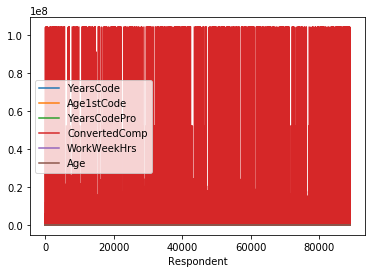

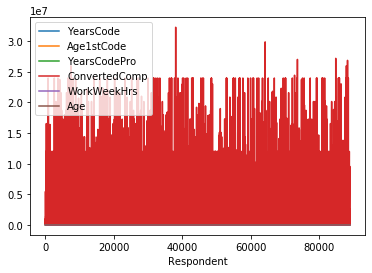

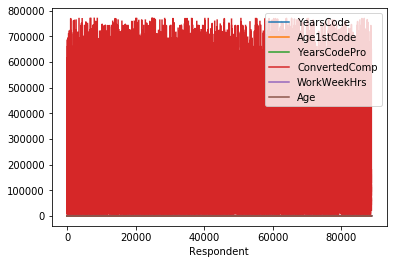

In [125]:
df_base.plot()
plt.show()
df_base_sd.plot()
plt.show()
df_base_q.plot()
plt.show()

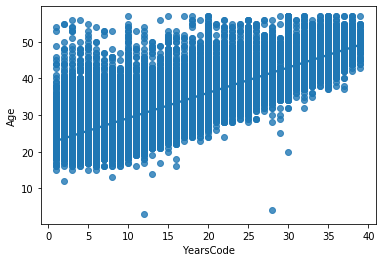

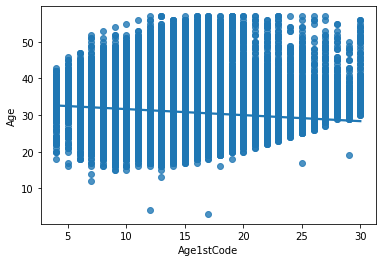

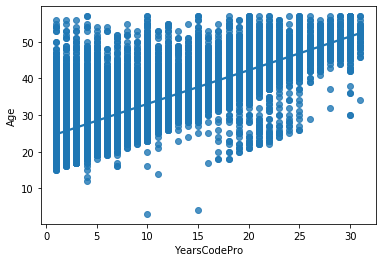

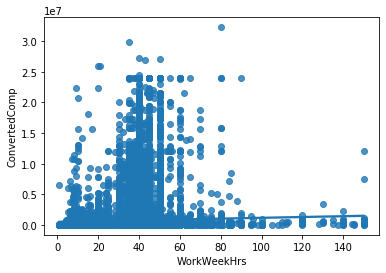

In [126]:
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['YearsCode'])
plt.show();
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['Age1stCode'])
plt.show();
sns.regplot(y=df_base_sd['Age'], x=df_base_sd['YearsCodePro'])
plt.show();
sns.regplot(y=df_base_sd['ConvertedComp'], x=df_base_sd['WorkWeekHrs'])
plt.show();

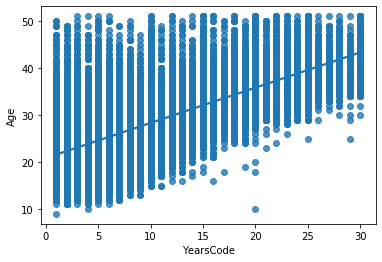

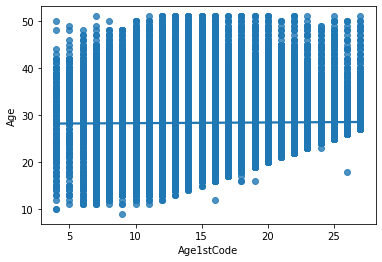

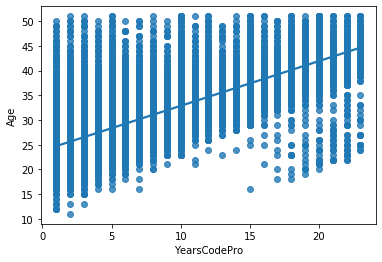

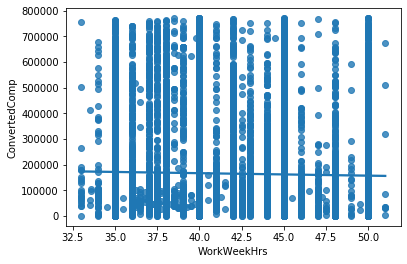

In [129]:
sns.regplot(y=df_base_q['Age'], x=df_base_q['YearsCode'])
plt.show();
sns.regplot(y=df_base_q['Age'], x=df_base_q['Age1stCode'])
plt.show();
sns.regplot(y=df_base_q['Age'], x=df_base_q['YearsCodePro'])
plt.show();
sns.regplot(y=df_base_q['ConvertedComp'], x=df_base_q['WorkWeekHrs'])
plt.show();

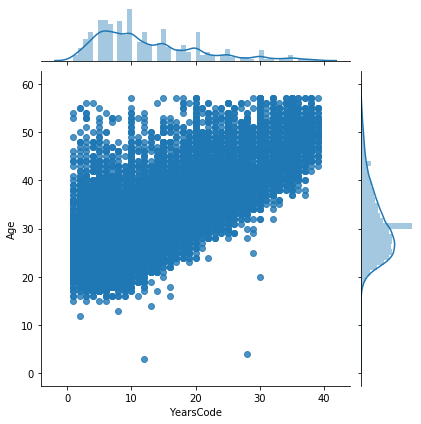

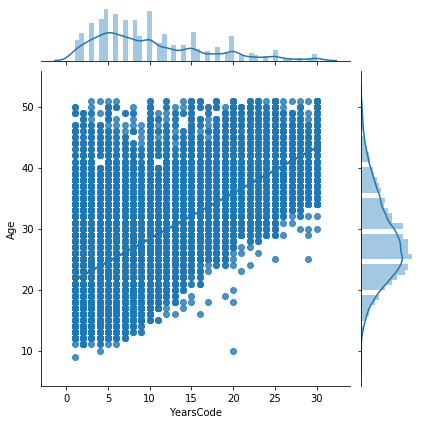

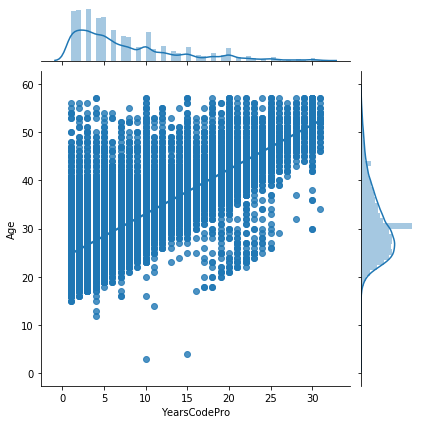

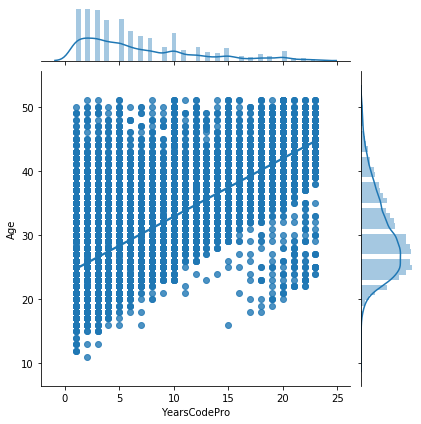

In [33]:
sns.jointplot(y='Age', x='YearsCode', data=df_base_sd, kind='reg')
plt.show();
sns.jointplot(y='Age', x='YearsCode', data=df_base_q, kind='reg')
plt.show();
sns.jointplot(y='Age', x='YearsCodePro', data=df_base_sd, kind='reg')
plt.show();
sns.jointplot(y='Age', x='YearsCodePro', data=df_base_q, kind='reg')
plt.show();

In [ ]:
df_answers.dtypes

In [ ]:
df_answers = df_answers.astype('float64', copy=False)

In [ ]:
df_answers.dtypes

In [130]:
reg_model = linear_model.LinearRegression()
reg_model.fit(df_base_sd[['YearsCodePro']], df_base_sd['Age']);

In [131]:
reg_model.predict([[1]])
reg_model.predict([[30]])

array([51.49119659])

In [133]:
df_base_sd['Age'].to_numpy()

array([28., 22., 28., ..., 34., 37., 33.])

In [134]:
mean_squared_error(df_base_sd['Age'].to_numpy(), reg_model.predict(df_base_sd[['YearsCode']]),squared=False)


6.5955988258114315

In [135]:
reg_model = linear_model.LinearRegression()
reg_model.fit(df_base_sd[['YearsCode','YearsCodePro']], df_base_sd['Age']);

In [136]:
mean_squared_error(df_base_sd['Age'].to_numpy(), reg_model.predict(df_base_sd[['YearsCode','YearsCode']]),squared=False)

5.703147056146088